# 윤대환 201601183
## 소프트웨어응용학부

In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['font.family'] = 'Malgun Gothic'


In [65]:
telco = pd.read_csv('telco.csv')

#### 데이터셋 설명
- Leave	가입해지여부(1이면 해지)
- MemberWeeks	가입기간
- NewContract	가입갱신여부(1이면 갱신)
- IsData	데이터요금제사용여부(1이면 사용)
- DataAmount	데이터사용량(GB)
- Callcenter	고객센터전화량
- CalMins	월평균전화량(분)
- CalCounts	월평균전화수(횟수)
- MonthlyFee	월평균요금
- OverFee	초과요금
- RoamingMin	로밍시간(분)


In [66]:
telco.isna().sum()

Leave          0
MemberWeeks    0
NewContract    0
IsData         0
DataAmount     0
Callcenter     0
CalMins        0
CalCounts      0
MonthlyFee     0
OverFee        0
RoamingMin     0
dtype: int64

결측치 값이 있는지 확인해 줍니다.

In [67]:
columns = {
    "Leave" :"가입해지여부",
    "MemberWeeks": "가입기간",
    "NewContract": "가입갱신여부",
    "IsData":"데이터요금제사용여부",
    "DataAmount":"데이터사용량",
    "Callcenter": "고객센터전화량",
    "CalMins": "월평균전화량",
    "CalCounts": "월평균전화수",
    "MonthlyFee": "월평균요금",
    "OverFee": "초과요금",
    "RoamingMin": "로밍시간"
        }
telco = telco.rename(columns = columns)


피처이름을 보기 쉽게 변경해 줍니다.

In [28]:
telco.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   가입해지여부      3333 non-null   int64  
 1   가입기간        3333 non-null   int64  
 2   가입갱신여부      3333 non-null   int64  
 3   데이터요금제사용여부  3333 non-null   int64  
 4   데이터사용량      3333 non-null   float64
 5   고객센터전화량     3333 non-null   int64  
 6   월평균전화량      3333 non-null   float64
 7   월평균전화수      3333 non-null   int64  
 8   월평균요금       3333 non-null   float64
 9   초과요금        3333 non-null   float64
 10  로밍시간        3333 non-null   float64
dtypes: float64(5), int64(6)
memory usage: 286.6 KB


In [5]:
telco.describe().T

,count,mean,std,min,25%,50%,75%,max
가입해지여부,3333.0,0.144914,0.352067,0.0,0.00,0.00,0.00,1.00
가입기간,3333.0,101.064806,39.822106,1.0,74.00,101.00,127.00,243.00
가입갱신여부,3333.0,0.903090,0.295879,0.0,1.00,1.00,1.00,1.00
데이터요금제사용여부,3333.0,0.276628,0.447398,0.0,0.00,0.00,1.00,1.00
데이터사용량,3333.0,0.816475,1.272668,0.0,0.00,0.00,1.78,5.40
고객센터전화량,3333.0,1.562856,1.315491,0.0,1.00,1.00,2.00,9.00
월평균전화량,3333.0,179.775098,54.467389,0.0,143.70,179.40,216.40,350.80
월평균전화수,3333.0,100.435644,20.069084,0.0,87.00,101.00,114.00,165.00
월평균요금,3333.0,56.305161,16.426032,14.0,45.00,53.50,66.20,111.30
초과요금,3333.0,10.051488,2.535712,0.0,8.33,10.07,11.77,18.19


In [68]:
telco.가입해지여부 = telco.가입해지여부.astype("int8")
telco.가입기간 = telco.가입기간.astype("int16")
telco.가입갱신여부 = telco.가입갱신여부.astype("int8")
telco.데이터요금제사용여부 = telco.데이터요금제사용여부.astype("int8")
telco.데이터사용량 = telco.데이터사용량.astype("float16")
telco.고객센터전화량 = telco.고객센터전화량.astype("int8")
telco.월평균전화량 = telco.월평균전화량.astype("float16")
telco.월평균전화수 = telco.월평균전화수.astype("int16")
telco.월평균요금 = telco.월평균요금.astype("float16")
telco.초과요금 = telco.초과요금.astype("float16")
telco.로밍시간 = telco.로밍시간.astype("float16")
telco


,가입해지여부,가입기간,가입갱신여부,데이터요금제사용여부,데이터사용량,고객센터전화량,월평균전화량,월평균전화수,월평균요금,초과요금,로밍시간
0,0,128,1,1,2.699219,1,265.000,110,89.00000,9.867188,10.000000
1,0,107,1,1,3.699219,1,161.625,123,82.00000,9.781250,13.703125
2,0,137,1,0,0.000000,0,243.375,114,52.00000,6.058594,12.203125
3,0,84,0,0,0.000000,2,299.500,71,57.00000,3.099609,6.601562
4,0,75,0,0,0.000000,3,166.750,113,41.00000,7.421875,10.101562
...,...,...,...,...,...,...,...,...,...,...,...
3328,0,192,1,1,2.669922,2,156.250,77,71.68750,10.781250,9.898438
3329,0,68,1,0,0.340088,3,231.125,57,56.40625,7.671875,9.601562
3330,0,28,1,0,0.000000,2,180.750,109,56.00000,14.437500,14.101562
3331,0,184,0,0,0.000000,2,213.750,105,50.00000,7.980469,5.000000


데이터셋의 용량을 줄여주기 위해 각각의 데이터타입을 변경해 줍니다.

#### telco.데이터사용량 =  telco.데이터사용량.apply(lambda x : round(x , 2))
#### telco.월평균전화량 =  telco.월평균전화량.apply(lambda x : round(x , 1))
#### telco.월평균요금 =  telco.월평균요금.apply(lambda x : round(x , 1))
#### telco.초과요금 =  telco.초과요금.apply(lambda x : round(x , 2))
#### telco.로밍시간 =  telco.로밍시간.apply(lambda x : x.__round__(2))
소수점자리가 변동이 생겨 round함수를 사용하여 수정하려고 했으나  round함수를 사용하면 데이터 타입이 다시 float64형태로 돌아가는 현상이 발생했습니다.
그리하여 이부분은 생략했습니다.

In [83]:
telco.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   가입해지여부      3333 non-null   int8   
 1   가입기간        3333 non-null   int16  
 2   가입갱신여부      3333 non-null   int8   
 3   데이터요금제사용여부  3333 non-null   int8   
 4   데이터사용량      3333 non-null   float16
 5   고객센터전화량     3333 non-null   int8   
 6   월평균전화량      3333 non-null   float16
 7   월평균전화수      3333 non-null   int16  
 8   월평균요금       3333 non-null   float16
 9   초과요금        3333 non-null   float16
 10  로밍시간        3333 non-null   float16
dtypes: float16(5), int16(2), int8(4)
memory usage: 58.7 KB


In [69]:
telco

,가입해지여부,가입기간,가입갱신여부,데이터요금제사용여부,데이터사용량,고객센터전화량,월평균전화량,월평균전화수,월평균요금,초과요금,로밍시간
0,0,128,1,1,2.699219,1,265.000,110,89.00000,9.867188,10.000000
1,0,107,1,1,3.699219,1,161.625,123,82.00000,9.781250,13.703125
2,0,137,1,0,0.000000,0,243.375,114,52.00000,6.058594,12.203125
3,0,84,0,0,0.000000,2,299.500,71,57.00000,3.099609,6.601562
4,0,75,0,0,0.000000,3,166.750,113,41.00000,7.421875,10.101562
...,...,...,...,...,...,...,...,...,...,...,...
3328,0,192,1,1,2.669922,2,156.250,77,71.68750,10.781250,9.898438
3329,0,68,1,0,0.340088,3,231.125,57,56.40625,7.671875,9.601562
3330,0,28,1,0,0.000000,2,180.750,109,56.00000,14.437500,14.101562
3331,0,184,0,0,0.000000,2,213.750,105,50.00000,7.980469,5.000000


c:\users\eoghk\anaconda3\envs\section\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\users\eoghk\anaconda3\envs\section\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


<AxesSubplot:>

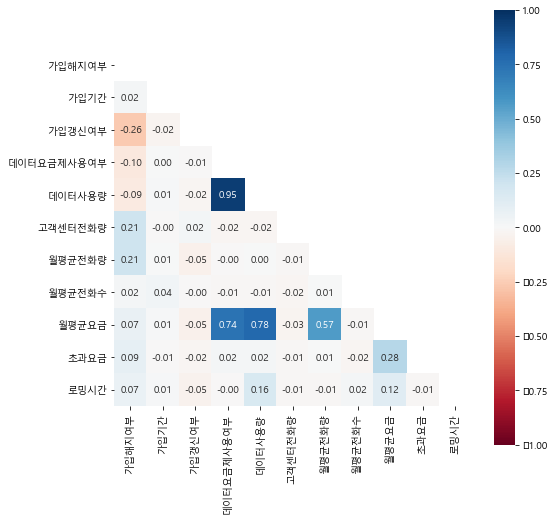

In [70]:
fig, ax = plt.subplots(figsize=(8, 8))
corr = telco.corr()
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(
 corr,
 mask=mask,
 fmt='.2f',
 annot=True,
 ax=ax,
 cmap='RdBu',
 vmin=-1,
 vmax=1,
 square=True
#  hue = '가입'
)

각각의 피처들에 대한 상관관계를 비교해 보았습니다. 월평균요금에 대해 가입기간, 고객센터전화량, 월평균전화수 피처를 제외하고 나머지 피처들은 양의 상관관계를 보이는걸 확인할 수 있습니다. 월평균요금에서 데이터사용량의 피처가 가장큰 0.78의 값을 보이는걸 알 수 있습니다. 월평균요금에 있어서 데이터사용량 > 월평균전화량 > 초과요금 > 로밍시간 순으로 영향을 크게 미친다는 걸 알 수 있습니다. 그리고 데이터사용량은 데이터요금제사용여부의 컬럼과 상관관계가 0.95로 높은 수치를 나타내고 있습니다.

In [71]:
pd.crosstab(telco.가입해지여부, telco.가입갱신여부)

가입갱신여부,0,1
가입해지여부,,
0,186,2664
1,137,346


이동통신 사용자의 갱신과 해지 여부를 살펴보면, 가입하였다가 가입해지 하는 사용자의 경우 137명으로 상대적으로 적다. 이동통신에 가입했다가 대부분의 사람들은 가입을 갱신하는 것으로 추청할 수 있습니다. 가입을 갱신한 고객은 2664명으로 압도적으로 많은 수치를 보입니다.

그리하여 가입해지여부,가입갱신여부에 따라 4가지로 분류하고 분류한것들의 데이터셋을 비교해 보겠습니다.  

In [72]:
telco["가입"] = "00"

In [73]:
for i in range(0, len(telco)) :
    telco["가입"][i] =f"{telco.가입해지여부[i]}"f"{telco.가입갱신여부[i]}"

c:\users\eoghk\anaconda3\envs\section\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


### - telco.가입==00  가입한 고객
### - telco.가입==01  가입연장한 고객
### - telco.가입==10  가입후 연장하지 않고 해지한 고객
### - telco.가입==11  가입후 연장한후 해지한 고객

In [74]:
telco.가입 = telco.가입.astype("category")

In [75]:
telco = telco.drop(["가입해지여부", "가입갱신여부"], axis= 1)

필요없는 컬럼을 제거해 줍니다.


In [94]:
telco.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   가입기간        3333 non-null   int16   
 1   데이터요금제사용여부  3333 non-null   int8    
 2   데이터사용량      3333 non-null   float16 
 3   고객센터전화량     3333 non-null   int8    
 4   월평균전화량      3333 non-null   float16 
 5   월평균전화수      3333 non-null   int16   
 6   월평균요금       3333 non-null   float16 
 7   초과요금        3333 non-null   float16 
 8   로밍시간        3333 non-null   float16 
 9   가입          3333 non-null   category
dtypes: category(1), float16(5), int16(2), int8(2)
memory usage: 55.6 KB


In [13]:
telco

,가입기간,데이터요금제사용여부,데이터사용량,고객센터전화량,월평균전화량,월평균전화수,월평균요금,초과요금,로밍시간,가입
0,128,1,2.699219,1,265.000,110,89.00000,9.867188,10.000000,01
1,107,1,3.699219,1,161.625,123,82.00000,9.781250,13.703125,01
2,137,0,0.000000,0,243.375,114,52.00000,6.058594,12.203125,01
3,84,0,0.000000,2,299.500,71,57.00000,3.099609,6.601562,00
4,75,0,0.000000,3,166.750,113,41.00000,7.421875,10.101562,00
...,...,...,...,...,...,...,...,...,...,...
3328,192,1,2.669922,2,156.250,77,71.68750,10.781250,9.898438,01
3329,68,0,0.340088,3,231.125,57,56.40625,7.671875,9.601562,01
3330,28,0,0.000000,2,180.750,109,56.00000,14.437500,14.101562,01
3331,184,0,0.000000,2,213.750,105,50.00000,7.980469,5.000000,00


In [76]:
가입00 = telco[telco.가입 =="00"] # 가입한 고객
가입01 = telco[telco.가입 =="01"] # 가입연장한 고객
가입10 = telco[telco.가입 =="10"] # 가입후 연장하지 않고 해지한 고객
가입11 = telco[telco.가입 =="11"] # 가입후 연장한후 해지한 고객
가입00_1 = 가입00.groupby('데이터요금제사용여부').데이터요금제사용여부.count()
가입01_1 = 가입01.groupby('데이터요금제사용여부').데이터요금제사용여부.count()
가입10_1 = 가입10.groupby('데이터요금제사용여부').데이터요금제사용여부.count()
가입11_1 = 가입11.groupby('데이터요금제사용여부').데이터요금제사용여부.count()

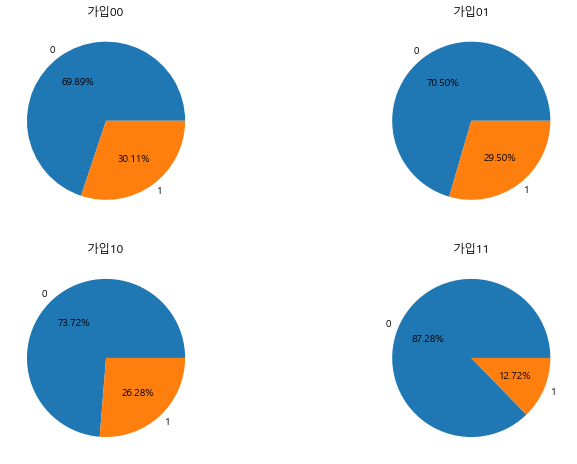

In [77]:
fig, axs = plt.subplots(nrows=4, figsize=(12, 8))
plt.subplot(221)
plt.pie(가입00_1,labels=가입00_1.index, autopct='%.2f%%')
plt.title('가입00')
plt.subplot(222)
plt.pie(가입01_1,labels=가입01_1.index, autopct='%.2f%%')
plt.title('가입01')
plt.subplot(223)
plt.pie(가입10_1,labels=가입01_1.index, autopct='%.2f%%')
plt.title('가입10')
plt.subplot(224)
plt.pie(가입11_1,labels=가입11_1.index, autopct='%.2f%%')
plt.title('가입11')
plt.show()

데이터요금제가입 여부에 대한 분류를 파이차트로 그려본 것이다. 그래프를 살펴보면 가입을 해지 하지 않은 부류는 30%가량 데이터요금제에 가입한것을  알수 있고, 가입을 해지한 고객은 26% , 12%로 낮은 수치를 기록하는 걸 확인 할 수 있다. 그리고 한가지 더 살펴보면 가입을 연장하고 나서  해지 하지 않은 고객과 해지한 고객에 대해 살펴보면 29% vs 12%를 기록하는걸 볼수 있다. 그리하여 가입을 연장한 고객중 데이터 요금제를 사용하지 않은 고객의 가입해지할 확률이 높다는걸 알 수 있다.

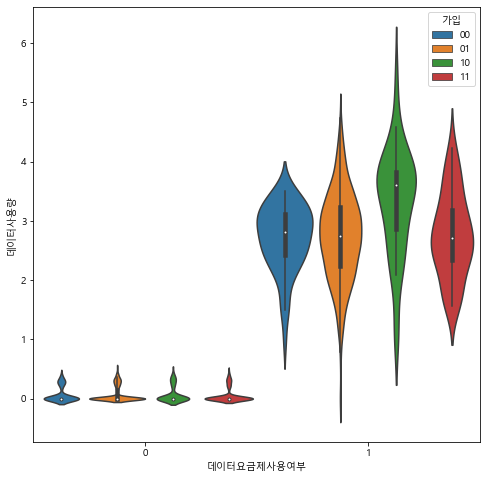

In [78]:
fig, ax = plt.subplots(figsize=(8, 8))
sns.violinplot( x= "데이터요금제사용여부",y = "데이터사용량", hue = "가입", 
              data = telco, width = 1.0)
plt.show()

violinplot으로 데이터요금제 사용여부에 따라 데이터사용량을 살펴본 결과입니다. 실질적으로 데이터요금제에 가입한 사람이 데이터사용량에서 압도적인 차이를 나타내고 있습니다. 데이터요금제에 가입을 안해도 데이터를 사용한 고객또한 있는것으로 나타내고 있습니다. 
가입형태에 따라 살펴보면 데이터요금제를 사용안하는 고객에 대한 분포는 4그룹 비슷한 형태를 나타내고 있습니다. 데이터요금제를 사용하는 고객에서는 가입00, 01,11은 평균적으로 2.8정도의 데이터사용량을 보이고 가입10의 형태의 고객이 3.6정도의 높은 데이터 사용량을 보이고 있습니다. 

<AxesSubplot:xlabel='데이터사용량'>

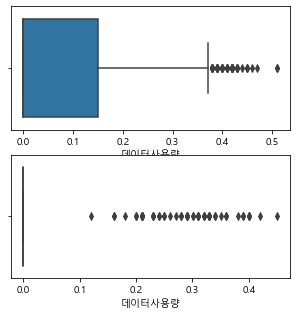

In [79]:
fig, axs = plt.subplots(nrows=2, figsize=(5, 5))
sns.boxplot(x=가입01[가입01.데이터요금제사용여부 == 0].데이터사용량, ax=axs[0])
sns.boxplot(x=가입11[가입11.데이터요금제사용여부 == 0].데이터사용량, ax=axs[1])

가입01의 그룹과 가입11의 데이터요금제를 사용안할때 데이터사용량에 대해 살펴보겠습니다. 그래프를 보면 가입11의 그룹경우 거의 대부분의 고객이 데이터사용량이 0을 기록하고 있습니다. 그러나 가입01의 그룹경우 50%의 고객들만 데이터사용량이 0을 기록하고 나머지 고객들은 데이터를 사용하는 것으로 측정되고 있습니다. 그리하여 가입을 연장하고 데이터사용량이 0일 고객의 경우 가입을 해지할 확률이 높다라는 가설을 새울수 있습니다.

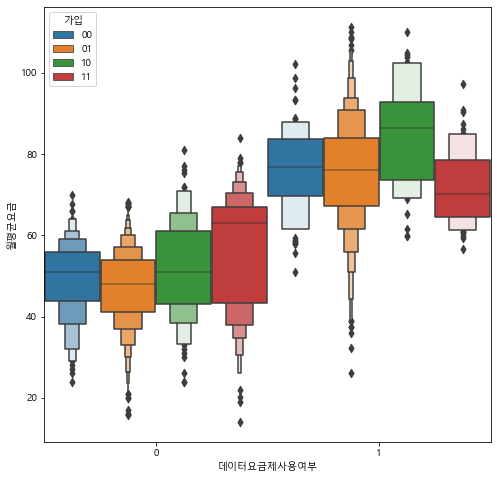

In [45]:
fig, ax = plt.subplots(figsize=(8, 8))
sns.boxenplot( x= "데이터요금제사용여부",y = "월평균요금", hue = "가입", 
              data = telco, width = 1.0)
plt.show()

데이터요금제 사용여부에 따라 월평균요금제 또한 크게 차이가 나는걸 확인 할 수 있습니다. 각 그룹에 따라 평균적으로 7 ~ 25정도의 월평균요금의 차이를 보이고 있습니다. 상관관계에서 살펴보면 월평균요금에는 데이터요금제사용여부와 데이터사용량이 0.7점대의 양의 상관관계를 볼수 있었습니다. 실질적으로 그래프를 통해서도 데이터요금제를 사용하는 고객이 데이터도 많이 사용하고 요금도 많이 지불하는걸 알수 있었습니다.

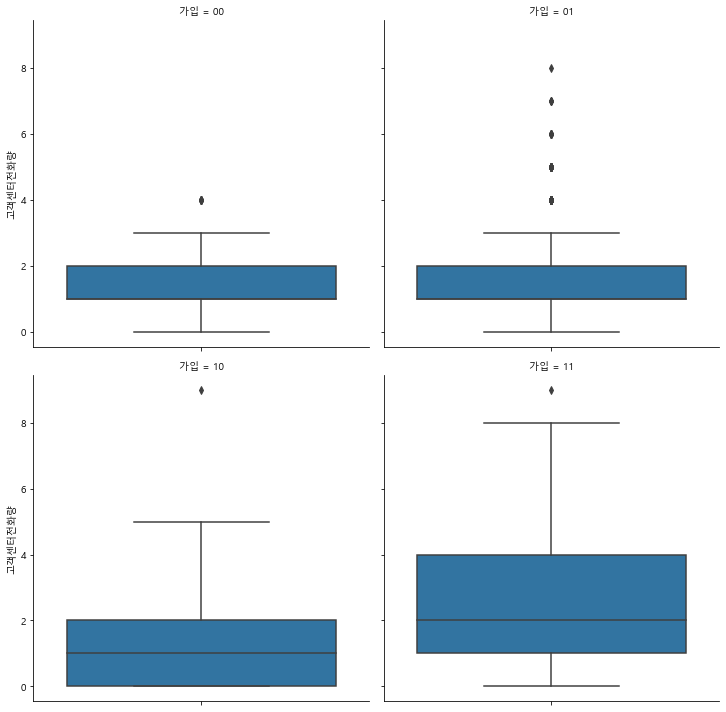

In [80]:
sns.catplot(
    y = '고객센터전화량',
    data= telco,
    kind='box',
    col='가입',
    col_wrap=2
)

고객센터전화량와 가입유형에 따른 분포를 살펴보면 가입을 해지한 그룹과 해지하지 않은 그룹 2가지로 나뉠수 있습니다. 해지 하지 않은 그룹은 비슷한 그래프 유형을 보입니다. 고객센터전화량이 2초과인 비율이 25%로 차지 하지만 가입을 해지한 그룹은 고객센터전화랑이 2초과인 비율이 50% 차지 하고 있습니다. 그리하여 가입을 해지한 그룹은 고객센터에 많이 전화를 했다고 할 수 있습니다. 
가입을 해지 하지 않고 사용하는 고객은 고객센터 전화수가 대부분 4이하의 수치를 기록하고 있습니다. 그러나 가입을 해지한 고객센터 전화수를 살펴보면 5이상의 수치도 많이 살펴 볼 수 있다. 그리하여 5이상의 수치를 기록한 전화량은 5로 다 통일시킨다음 전화량의 비율을 살펴보겠습니다.

In [84]:
telco1 =  telco
telco1.고객센터전화량 = telco1.고객센터전화량.apply(lambda x : x if x < 5 else 5)

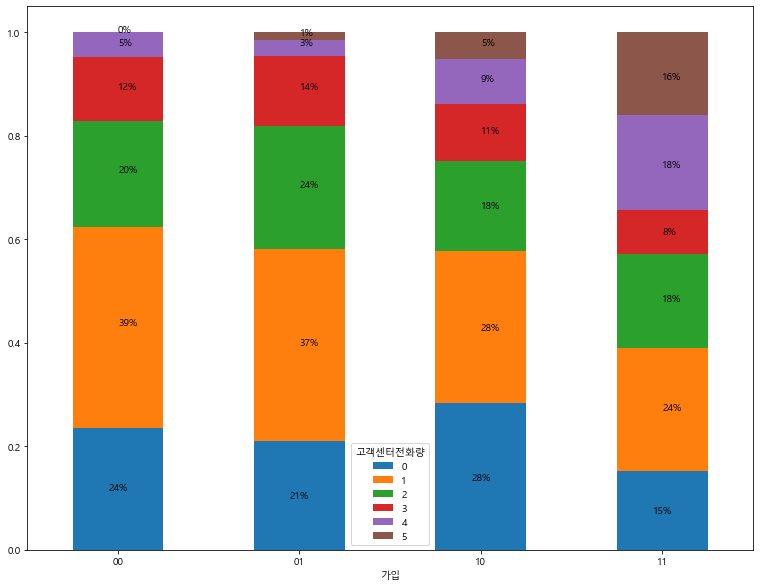

In [91]:
fig, ax = plt.subplots(figsize=(13, 10))
(
    telco1.pipe(lambda df_: pd.crosstab(df_.가입, df_.고객센터전화량))
    .pipe(lambda df_: df_.div(df_.sum(axis=1), axis=0))
    .plot.bar(stacked=True, rot=0, ax=ax)
)
for i in range(0,4):
    for j in range(0,6):
        if j== 0 :
            plt.text(i,telco1.pipe(lambda df_: pd.crosstab(df_.가입, df_.고객센터전화량)).pipe(lambda df_: df_.div(df_.sum(axis=1), axis=0)).round(2).iloc[i][j] / 2,
                     str(int(telco1.pipe(lambda df_: pd.crosstab(df_.가입, df_.고객센터전화량)).pipe(lambda df_: df_.div(df_.sum(axis=1), axis=0)).round(2).iloc[i][j]*100))+'%', va = 'center', ha = 'center')
        else:
            plt.text(i,(telco1.pipe(lambda df_: pd.crosstab(df_.가입, df_.고객센터전화량)).pipe(lambda df_: df_.div(df_.sum(axis=1), axis=0)).round(2).iloc[i][j] / 2 + sum(telco1.pipe(lambda df_: pd.crosstab(df_.가입, df_.고객센터전화량)).pipe(lambda df_: df_.div(df_.sum(axis=1), axis=0)).round(2).iloc[i][:j])),
                     str(int(telco1.pipe(lambda df_: pd.crosstab(df_.가입, df_.고객센터전화량)).pipe(lambda df_: df_.div(df_.sum(axis=1), axis=0)).round(2).iloc[i][j]*100))+'%')
            


모든 가입그룹에서 전화량이 1인 수치가 가장 높은것을 확인 할 수 있습니다. 가입을 해지 하지 않은 고객의 5번이상 고객센터에 전화한 비율은 각각 0%,1%를 기록했습니다. 그러나 가입을 해지한 고객에서는 각각 5%, 16%를 기록하며 해지 하지 않은 고객과의 큰 차이를 볼수 있었습니다. 가입11인 그룹에서는 오히려 전화를 0번한 고객보다 전화를 5번 이상한 고객의 수치가 더 큰것을 확인 할 수 있습니다. 만약 아직 해지 하지 않은 고객이 고객센터에 전화를 5번 이상한다면, 고객이 가입을 해지 할 확률이 높아 지므로 고객을 잡기 위해 더욱더 최선을 다 해야 할 것 같습니다. 

In [37]:
가입10.quantile([0, .10]).T

,0.0,0.1
가입해지여부,1.00,1.00
가입기간,2.00,61.20
가입갱신여부,0.00,0.00
데이터요금제사용여부,0.00,0.00
데이터사용량,0.00,0.00
고객센터전화량,0.00,0.00
월평균전화량,46.50,123.62
월평균전화수,42.00,69.00
월평균요금,24.00,39.00
초과요금,4.69,7.01


단기간에 해지한 고객의 범위를 설정해주기 위해 해지한 고객의 가입기간의 하위 10%를 살펴보면 2주~61주 인 것을 확인 할 수 있다. 그리하여 76주를 기준으로 월평균 요금에 대해 살펴보겠습니다.

<AxesSubplot:xlabel='월평균요금'>

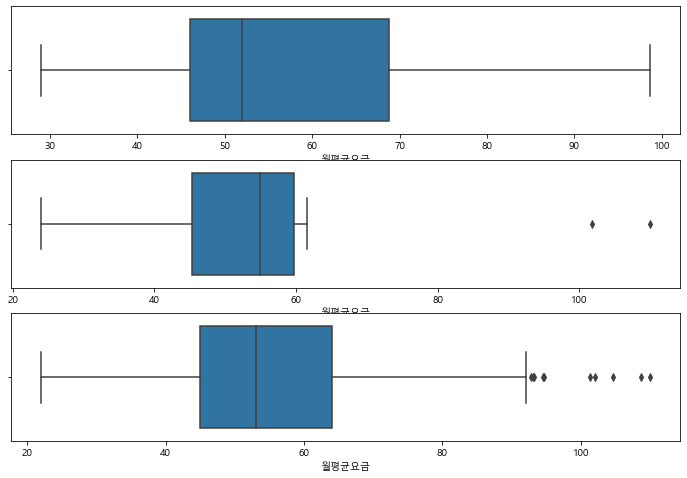

In [81]:
fig, axs = plt.subplots(nrows=3, figsize=(12, 8))
sns.boxplot(x=가입00[가입00.가입기간< 61].월평균요금, ax=axs[0])
sns.boxplot(x=가입10[가입10.가입기간< 61].월평균요금, ax=axs[1])
sns.boxplot(x=가입01[가입01.가입기간< 61].월평균요금, ax=axs[2])


 가입00에 해당하는 고객은 30부터 100까지 다양한 금액대의 월평균요금을 지불하고, 가입10에 해당하는 고객은 20부터 60대 초반의 월평균요금을 지불하고, 가입01에 해당하는 고객은 20부터 90대 초반까지의 분포를 보이고 100이상의 요금을 지불하는 고객도 확인할 수 있다.
단기간에 해지한 고객과 아직 해지하지 않은 고객들 간의 비교를 나타내면, 20%~50%에 해당하는 수치는 비슷하지만 75% 이상에 해당 요금은 확연히 차이가 나는 걸 알아볼 수 있다. 이 그림을 살펴보면 단기간에 해지하는 고객은 전체 고객의 월평균 요금인 58에 해당하는 요금보다 낮은 요금을 사용하는사람들이 많은걸 알 수 있다. 그리하여 단기간에 높은요금제를 사용하는 고객의 경우 해지하지 않고 가입을 유지할 가능성이 높다라는 가설을 세울 수 있습니다.

In [82]:
telco[(telco.가입 == '01')&(telco.데이터요금제사용여부 ==0) &(telco.고객센터전화량 >4)&(telco.데이터사용량==0)]

,가입기간,데이터요금제사용여부,데이터사용량,고객센터전화량,월평균전화량,월평균전화수,월평균요금,초과요금,로밍시간,가입
154,96,0,0.0,5,260.500,115,57.0,7.300781,11.500000,01
392,98,0,0.0,5,206.500,92,51.0,8.812500,12.398438,01
694,165,0,0.0,6,154.250,91,50.0,13.429688,10.898438,01
841,77,0,0.0,5,239.250,114,54.0,7.500000,10.296875,01
874,103,0,0.0,5,204.875,107,47.0,6.761719,10.398438,01
902,149,0,0.0,7,166.625,61,47.0,10.937500,8.203125,01
908,23,0,0.0,6,190.250,89,47.0,8.320312,15.000000,01
1246,138,0,0.0,5,194.250,83,50.0,9.500000,9.000000,01
1673,16,0,0.0,5,174.750,83,54.0,14.039062,10.500000,01
2031,130,0,0.0,5,139.125,72,45.0,12.296875,11.398438,01


그리하여 가입을 연장한 고객들중 데이터요금제사용을 안하고, 데이터사용을 안하고,고객센터에 전화를 5번이상한 고객을 추려보면 총 17명의 고객을 추릴 수 있습니다. 이 17명의 고객의 경우 가입을 해지할 확률을 높게 가지고 있습니다. 